In [1]:
#set up packages
import pandas as pd
import numpy as np
import plotly as plt
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as mplt
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.corpus import stopwords
from nltk import sent_tokenize
from nltk.tokenize import word_tokenize

In [ ]:
#import csv with comment data

#for when we do this locally
#comments = pd.read_csv('comments.csv')

from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Access the CSV file
file_path = '/content/drive/Shareddrives/Data Science 1 Project/comments_cleaned.csv'

# Read CSV into Pandas DataFrame
df = pd.read_csv(file_path)

Mounted at /content/drive


In [ ]:
df.head()

,game,video_id,comment_like_count,text,reply_count,comment_date,text_string,roberta_hs_score,roberta_label,roberta_score
0,Group Stage USA vs Vietnam,mg5R3CnlFeM,310,Did the USWNT impress you?,250.0,2023-07-22 03:25:44 UTC,Did the USWNT impress you?,"[{'label': 'nothate', 'score': 0.9998620748519...",0,0.999862
1,Group Stage USA vs Vietnam,mg5R3CnlFeM,0,Worst win ever!!!,0.0,2023-09-28 22:34:07 UTC,Worst win ever!!!,"[{'label': 'nothate', 'score': 0.9998587369918...",0,0.999859
2,Group Stage USA vs Vietnam,mg5R3CnlFeM,0,American Caucasian man here. My Chinese wife a...,0.0,2023-08-26 18:46:02 UTC,American Caucasian man here. My Chinese wife a...,"[{'label': 'hate', 'score': 0.9990511536598206}]",1,0.999051
3,Group Stage USA vs Vietnam,mg5R3CnlFeM,1,I love the USWNT!,0.0,2023-08-24 00:48:51 UTC,I love the USWNT!,"[{'label': 'nothate', 'score': 0.9998632669448...",0,0.999863
4,Group Stage USA vs Vietnam,mg5R3CnlFeM,0,USWNT looking very convincingly like the team ...,0.0,2023-08-21 04:17:03 UTC,USWNT looking very convincingly like the team ...,"[{'label': 'nothate', 'score': 0.9989615678787...",0,0.998962


In [ ]:
# test
fig1 = px.bar(df, x='game', y="roberta_label", color='game',
             facet_row='roberta_label', facet_col='game')

fig1.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# hate speech vs non hate speech for each game
fig2 = px.bar(df, x="roberta_label", y="game", orientation='h', color= "roberta_label")
fig2.update_traces(marker=dict(color='red'))
fig2.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
fig = px.bar(df, x="roberta_label", y="game", orientation='h',
             hover_data=['roberta_label'], color='game',
             labels={'roberta_label':'Hate Speech'})
fig.update_traces(dict(marker_line_width=0))
fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# categorical histogram
df['hate_category'] = np.where(df['roberta_label']== 1, "Hate", "Not Hate")
df.head()
fig = px.bar(df, x="hate_category", y="game",
             #color="hate_category",
             barmode="stack",
             orientation='h',#, facet_col="game",
             category_orders={"hate_category": ["Hate", "Not Hate"]})
fig.update_traces(dict(marker_line_width=0))
fig.show()


Output hidden; open in https://colab.research.google.com to view.

<Axes: xlabel='roberta_label', ylabel='game'>

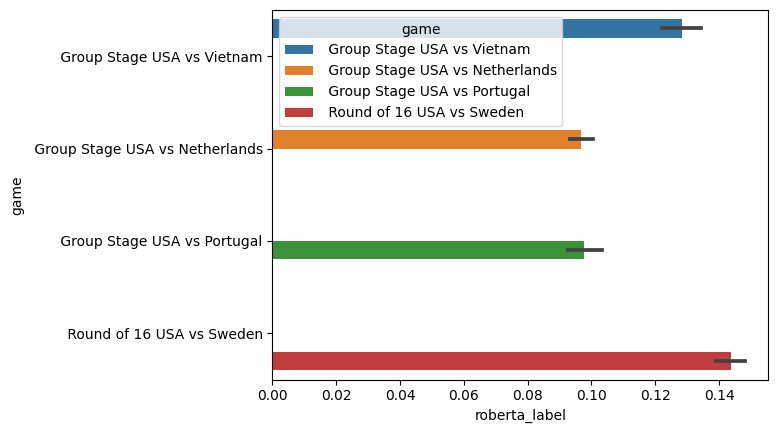

In [ ]:
sns.barplot(df, x="roberta_label", y="game", hue="game")

In [ ]:
# percentage of comments that are hate speech



In [ ]:
# roberta score, seperate hate and non hate speech and then show distribution

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
comments_bad = df[df["roberta_label"] == 1]["text_string"].dropna().astype(str)

all_comments_bad = ' '.join(comments_bad)

words_bad = word_tokenize(all_comments_bad)

In [ ]:
stop_words = set(stopwords.words('english'))


In [ ]:
custom_stop = ['goal', 'match', 'player', 'team', 'soccer', 'football', 'score', 'play', 'ball', 'league', 'us', 'uswnt',
               'watch', 'world cup', 'world', 'cup', 'sweden', 'usa', 'thailand', 'player', 'france', 'women soccer', 'us women',
               'american', 'game', 'country', 'players', 'america', 'americans', 'japan', 'africa', 'think', 'vietnam','england',
               'portugal', 'win', 'won', 'way', 'much', 'one', 'get', 'african', 'like', 'see', 'would', 'swedish', 'also', 'going',
               'women', 'woman', 'girl', 'even', 'probably', 'thing', 'really', 'know', 'play', 'vietnamese', 'sport', 'girls',
               'playing', 'want', 'people', 'teams', 'time', 'go', 'lost', 'cameroon', 'thai', 'could', 'sports', 'say', 'many', 'got',
               'netherland', 'womens', 'kick', 'maybe', 'year', 'said', 'keeper', 'goalie', 'goalkeeper', 'watching', 'watch', 'goals',
               'beat', 'shot', 'penalty', 'final', 'tournament', 'coach', 'field', 'lose', 'losing', 'winning', 'scored', 'defender', 'played']
stop_words.update(custom_stop)


In [ ]:
filtered_words_bad = [word.lower() for word in words_bad if word.isalpha() and word.lower() not in stop_words]
filtered_text_bad = ' '.join(filtered_words_bad)

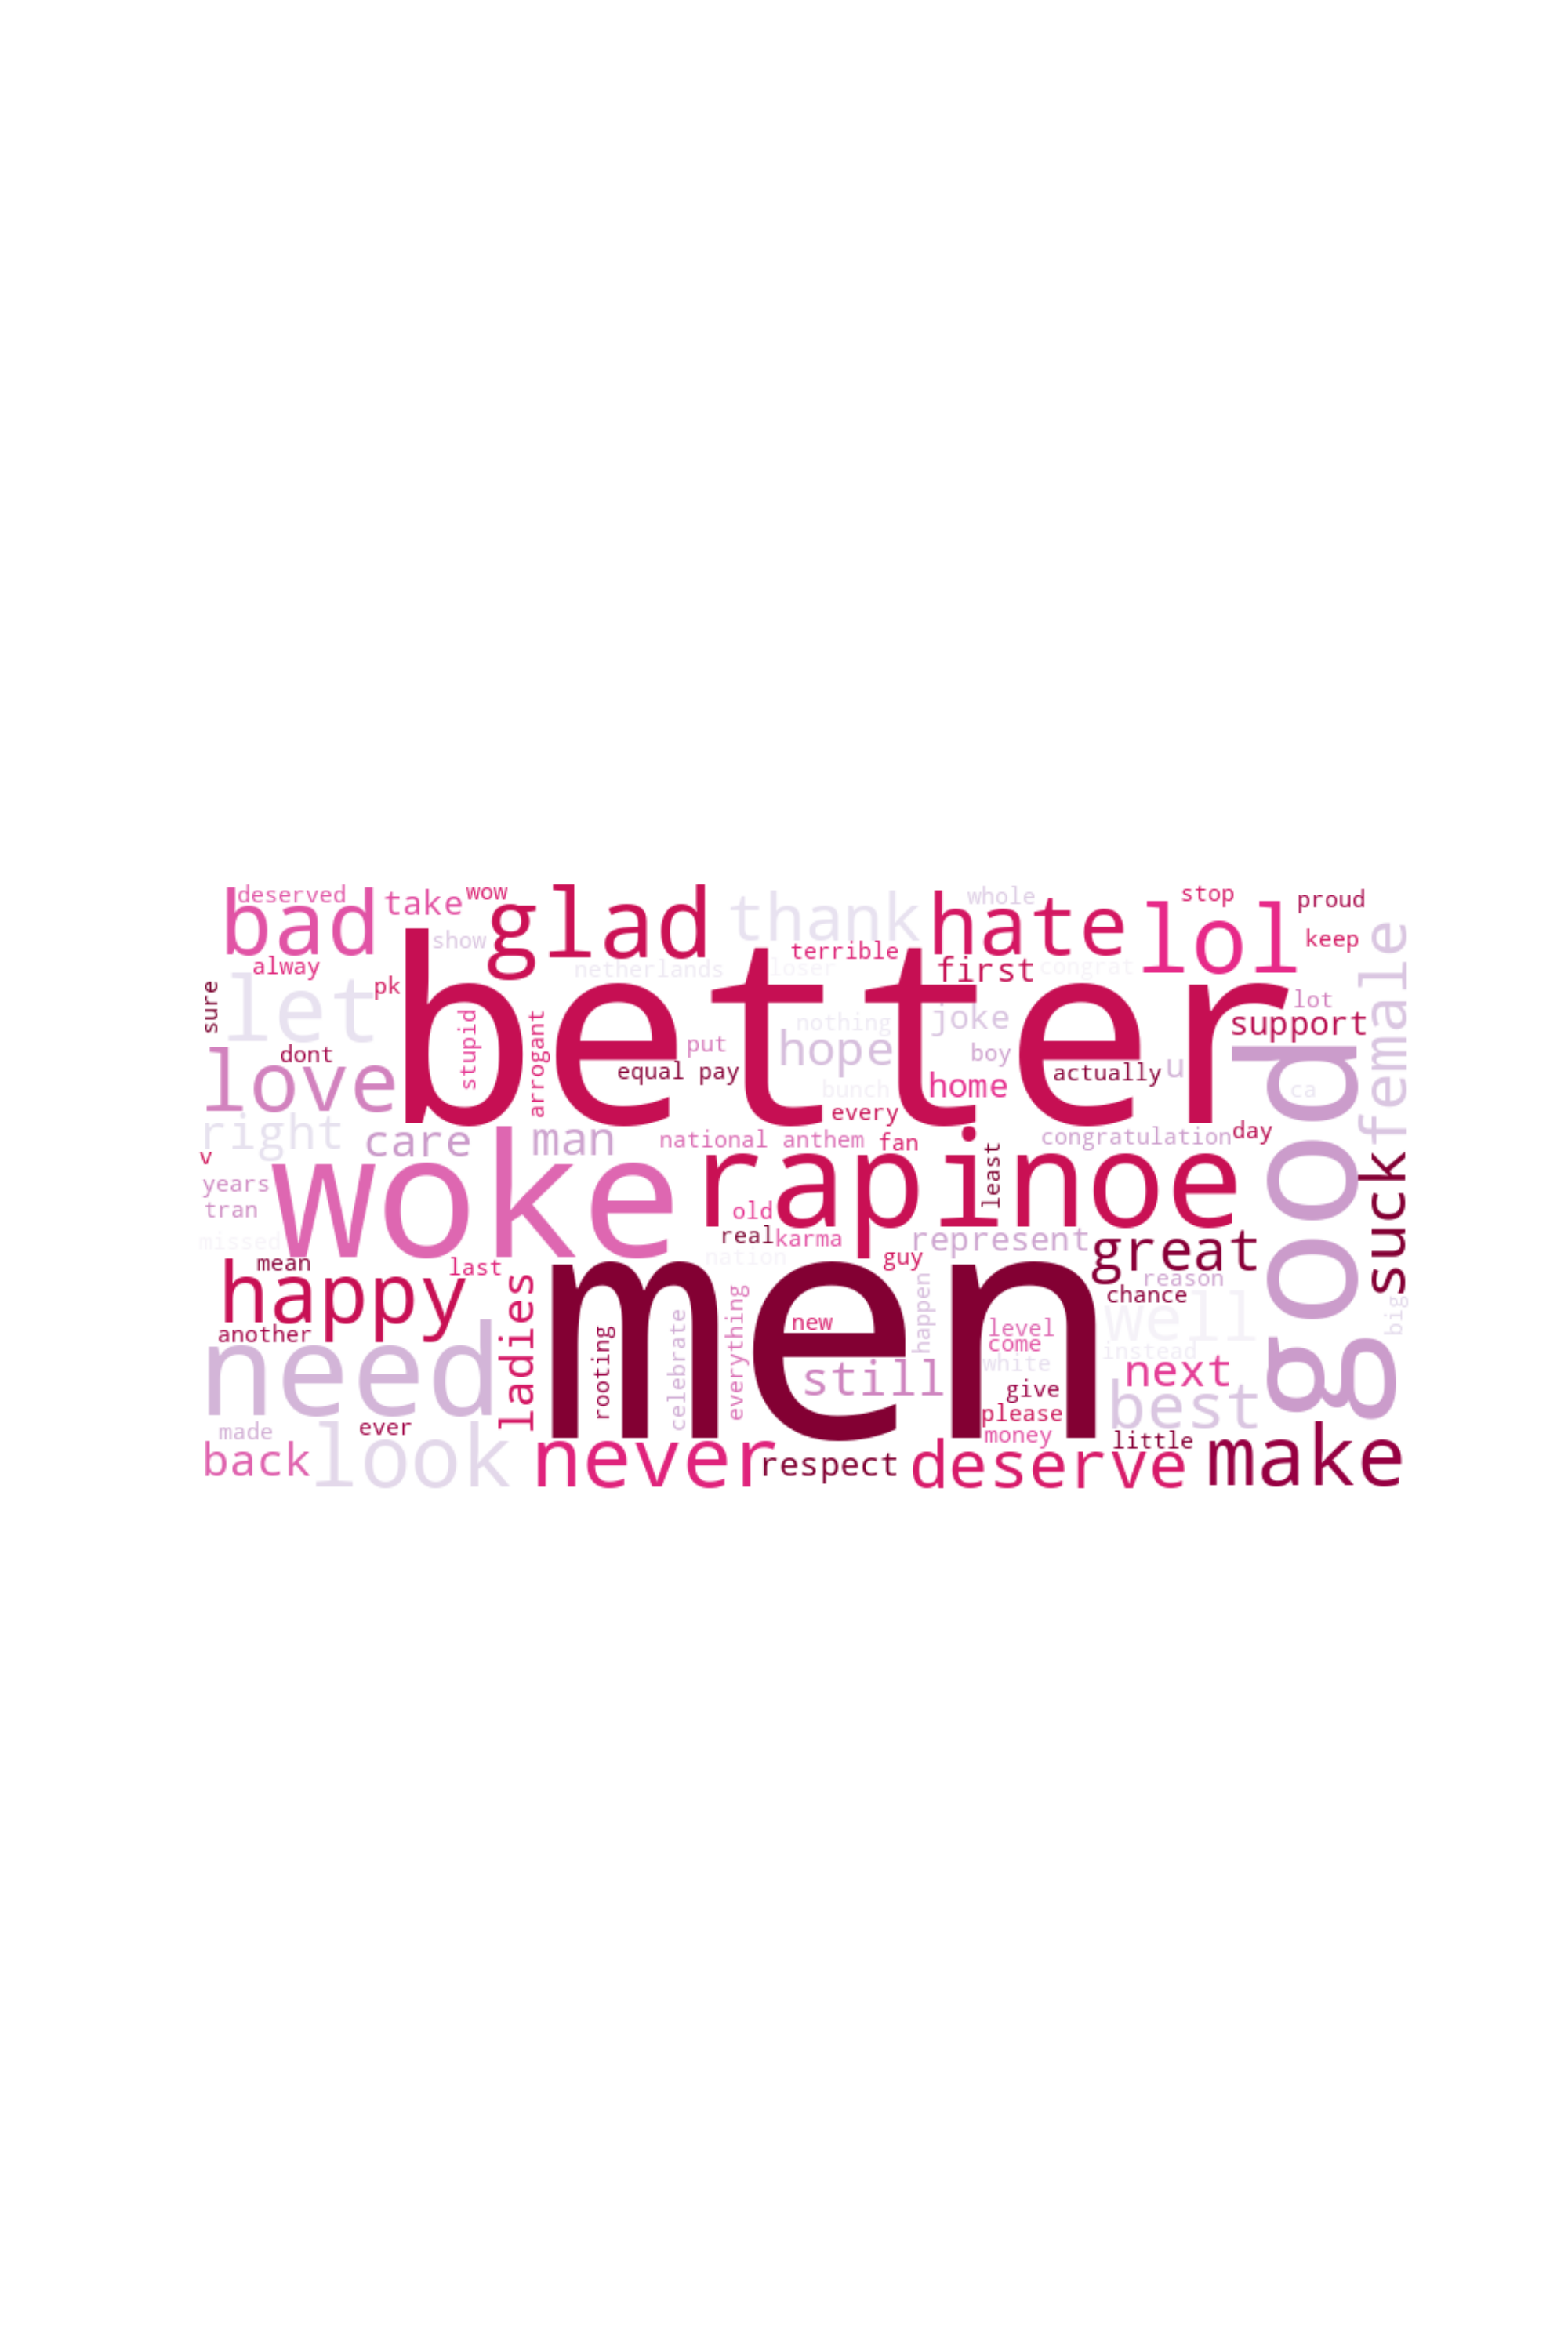

In [ ]:
wordcloud_bad = WordCloud(width=800, height=400, background_color = "white", max_words = 100, stopwords = stop_words, colormap = "PuRd").generate(filtered_text_bad)

mplt.figure(figsize=(10,15))
mplt.imshow(wordcloud_bad, interpolation ='bilinear')
mplt.axis('off')
mplt.show()

In [ ]:
comments_good = df[df["roberta_label"] == 0]["text_string"].dropna().astype(str)

all_comments_good = ' '.join(comments_good)

words_good = word_tokenize(all_comments_good)

In [ ]:
filtered_words_good = [word.lower() for word in words_good if word.isalpha() and word.lower() not in stop_words]
filtered_text_good = ' '.join(filtered_words_good)

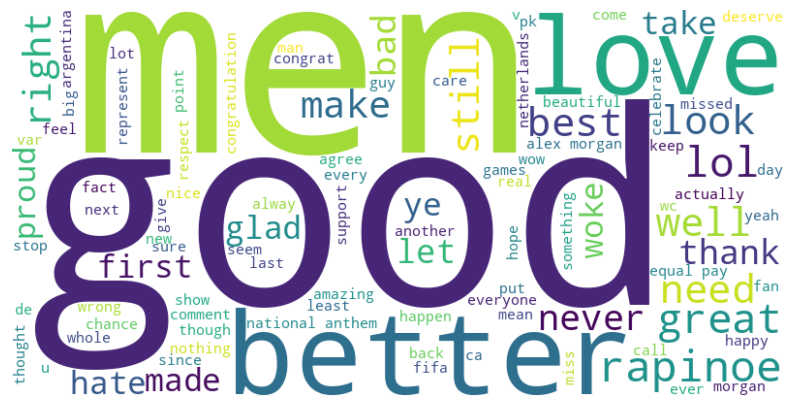

In [ ]:
wordcloud_good = WordCloud(width=800, height=400, background_color = "white", max_words = 100, stopwords = stop_words).generate(filtered_text_good)

mplt.figure(figsize=(10,15))
mplt.imshow(wordcloud_good, interpolation ='bilinear')
mplt.axis('off')
mplt.show()

In [ ]:
#number of hate comments by day
#percent of likes

In [ ]:
from plotnine import *

In [ ]:
df['comment_date'] = pd.to_datetime(df['comment_date']).dt.strftime('%Y-%m-%d')
game_order = [' Group Stage USA vs Vietnam', ' Group Stage USA vs Netherlands', ' Group Stage USA vs Portugal', ' Round of 16 USA vs Sweden']
df['games_ordered'] = pd.Categorical(df['game'], categories=game_order, ordered=True)

In [ ]:
hate_comments = df[(df['roberta_label'] == 1) & (df['comment_date'] >= '2023-07-21') & (df['comment_date'] < '2023-09-01')]
hate_comments_day = hate_comments.groupby(['games_ordered', 'comment_date']).size().reset_index(name='total_comments')


In [ ]:
palette = ['#FFB6C1', '#FFD700', '#87CEEB', '#98FB98']
reference_dates = ['2023-07-21', '2023-07-26', '2023-08-01', '2023-08-06']

time_plot_line = (
    ggplot(hate_comments_day, aes(x='comment_date', y='total_comments', group='games_ordered', color= 'games_ordered')) +
    geom_line(size = 1) +
    geom_vline(xintercept=reference_dates, linetype='dashed', color='lightgray', size=0.7) +
    scale_x_date(breaks='1 week', date_labels='%m-%d') +
    #scale_y_continuous(limits=(None, 2000)) +
    #expand_limits(y=0) +
    scale_color_manual(values=palette_2) +
    facet_wrap('~games_ordered', scales='free_y', ncol=1) +  # Single column for all games
    labs(title='Hate comments by day', x='Date', y='Number of comments') +
    guides(color=False) +
    theme_minimal() +
    theme(figure_size=(10, 10), panel_grid_major=None, axis_text_x=element_text(rotation=45, hjust=1, family = 'monospace'),
          text=element_text(family='monospace'), plot_title=element_text(hjust=0.5, family = 'monospace'))
)


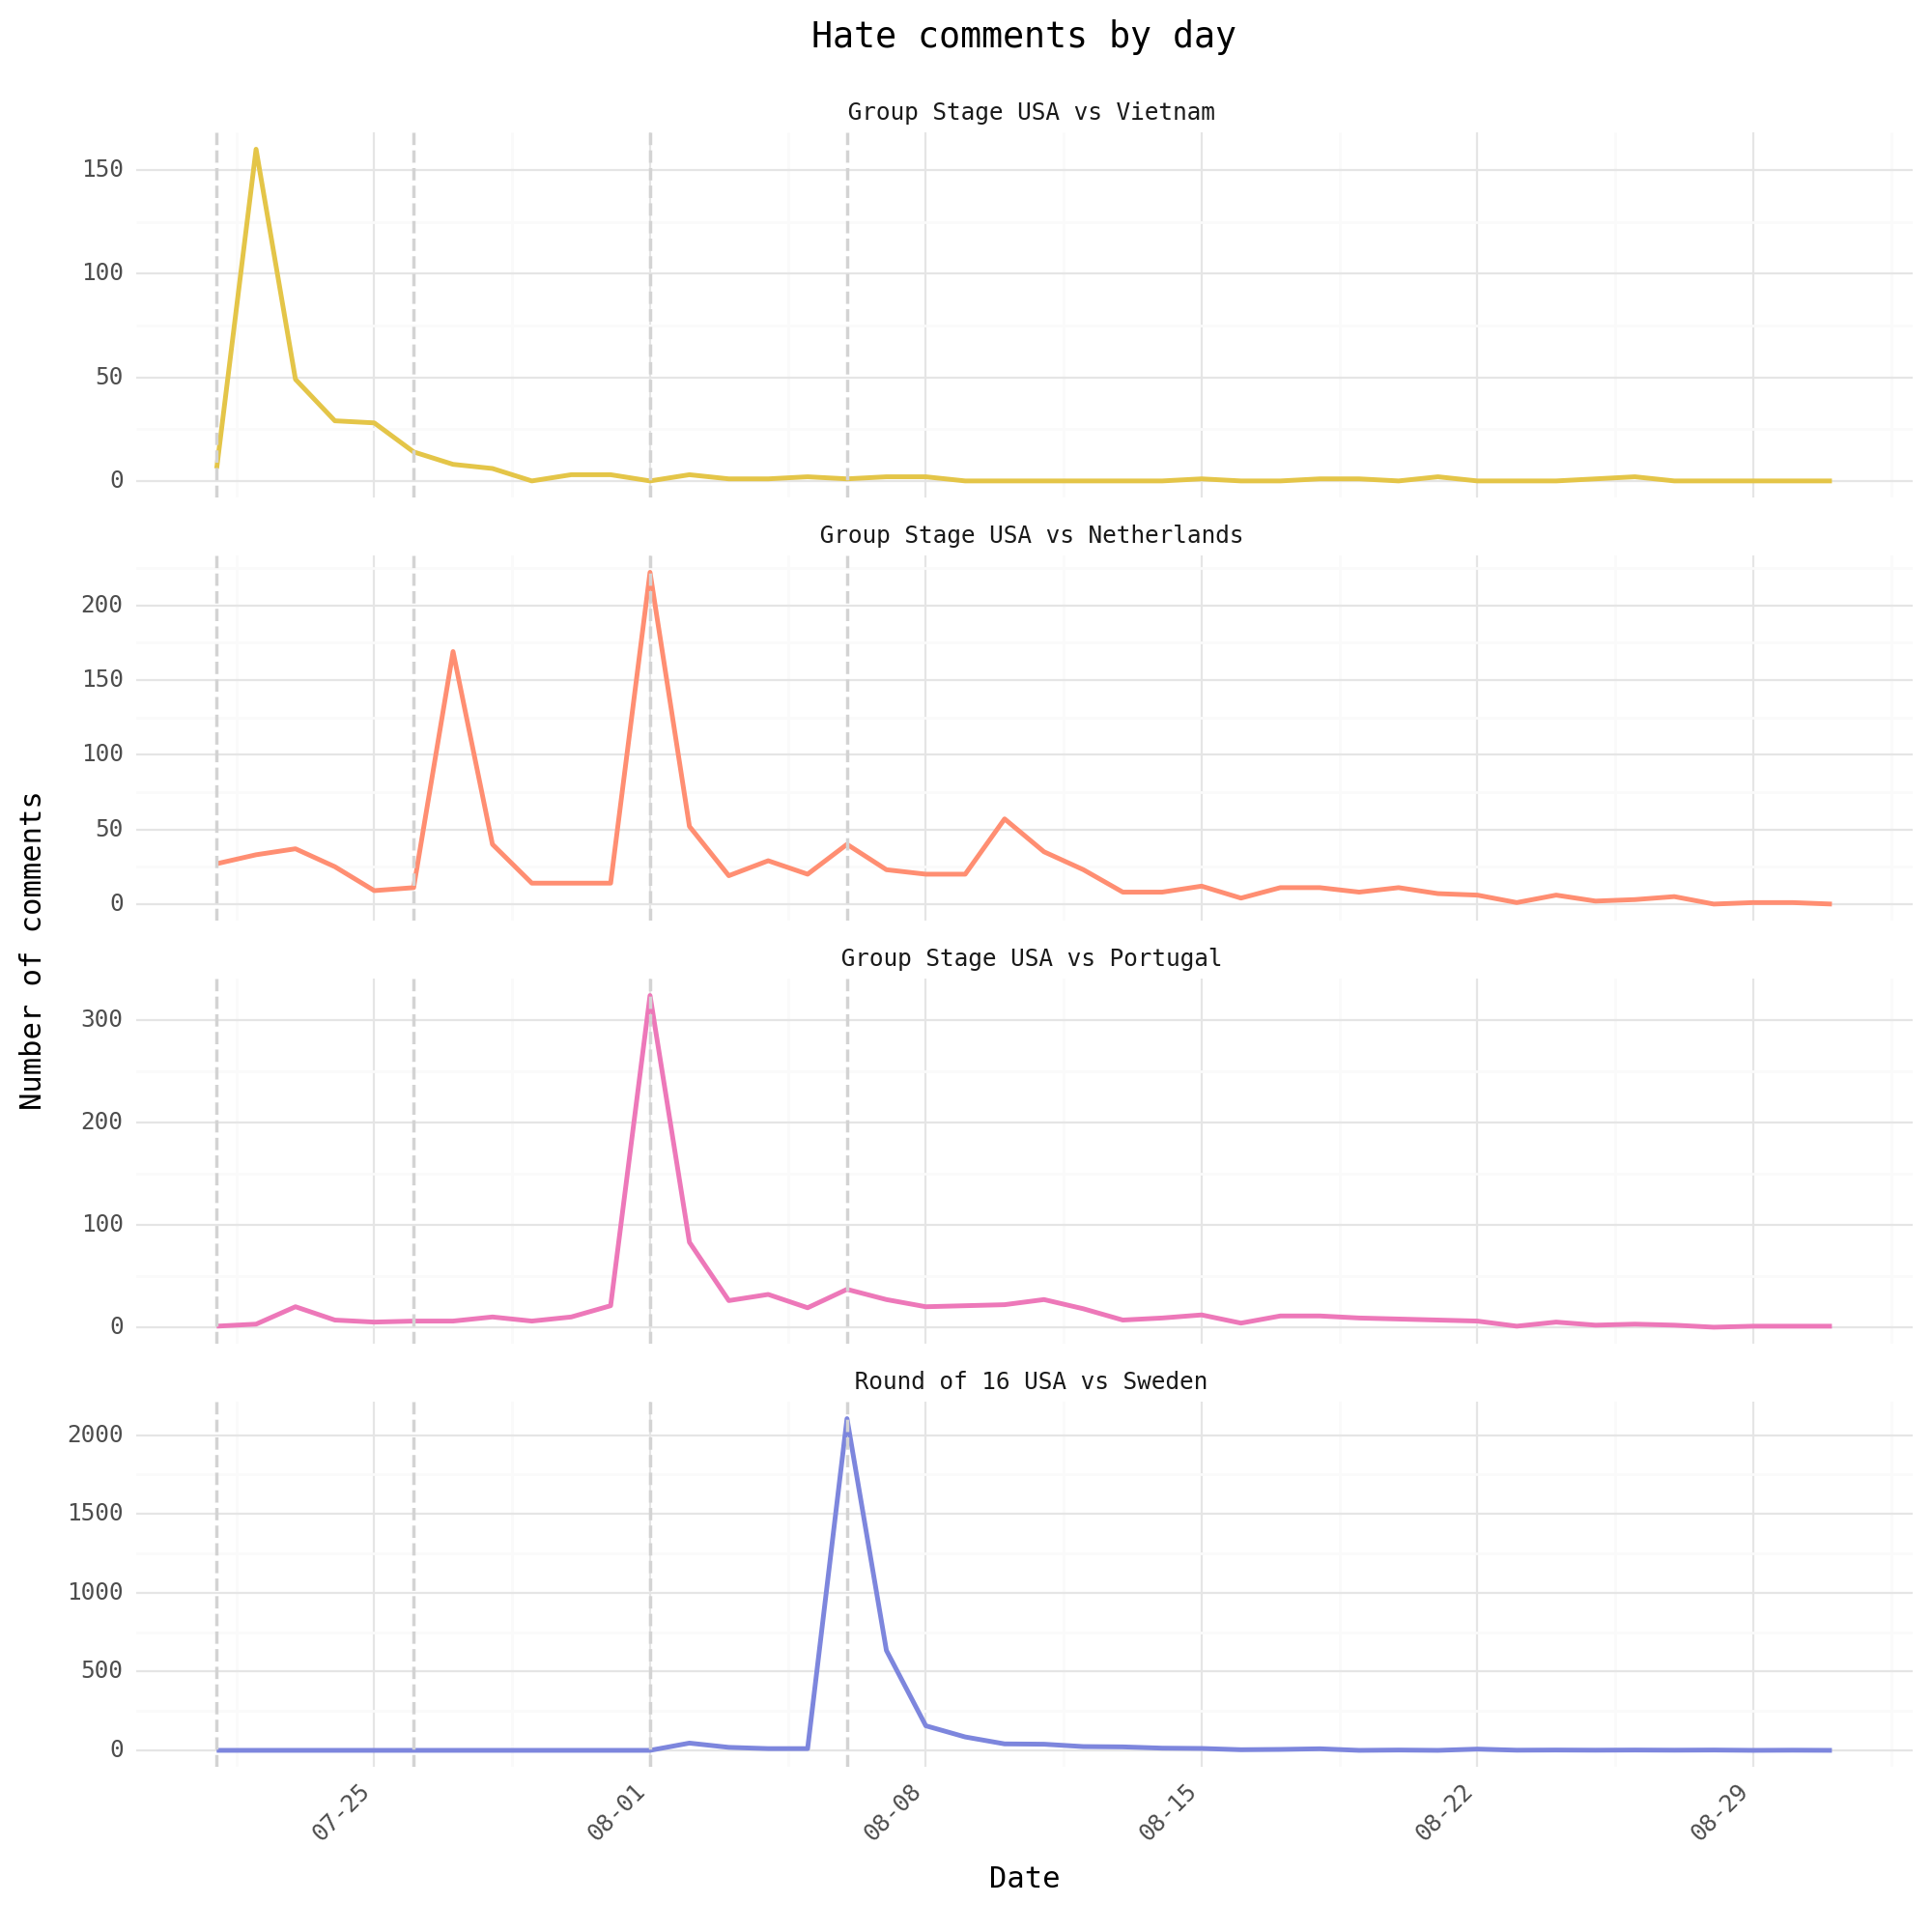

<Figure Size: (1000 x 1000)>

In [ ]:

time_plot_line

In [ ]:
reference_dates = ['2023-07-21', '2023-07-26', '2023-08-01', '2023-08-06']
palette_2 = ['#e4c548', '#ff8e72', '#ed78b9', '#7d86dd']
time_plot_line_2 = (
    ggplot(hate_comments_day, aes(x='comment_date', y='total_comments', group='games_ordered', color='games_ordered')) +
    geom_line(size=1) +
    geom_vline(xintercept=reference_dates, linetype='dashed', color='grey', size=0.5) +
    scale_x_date(breaks='1 week', date_labels='%m-%d') +
    scale_color_manual(values=palette_2) +
    labs(title='Hate comments over time', x = '', y='Number of comments') +
    guides(color=guide_legend(title='')) +
    theme_minimal() +
    theme(figure_size=(12, 6), axis_text_x=element_text(rotation=45, hjust=1, family = 'monospace'), text=element_text(family='monospace'),
          plot_title=element_text(hjust=0.5, family = 'monospace'), panel_grid_major_x= element_blank())
)

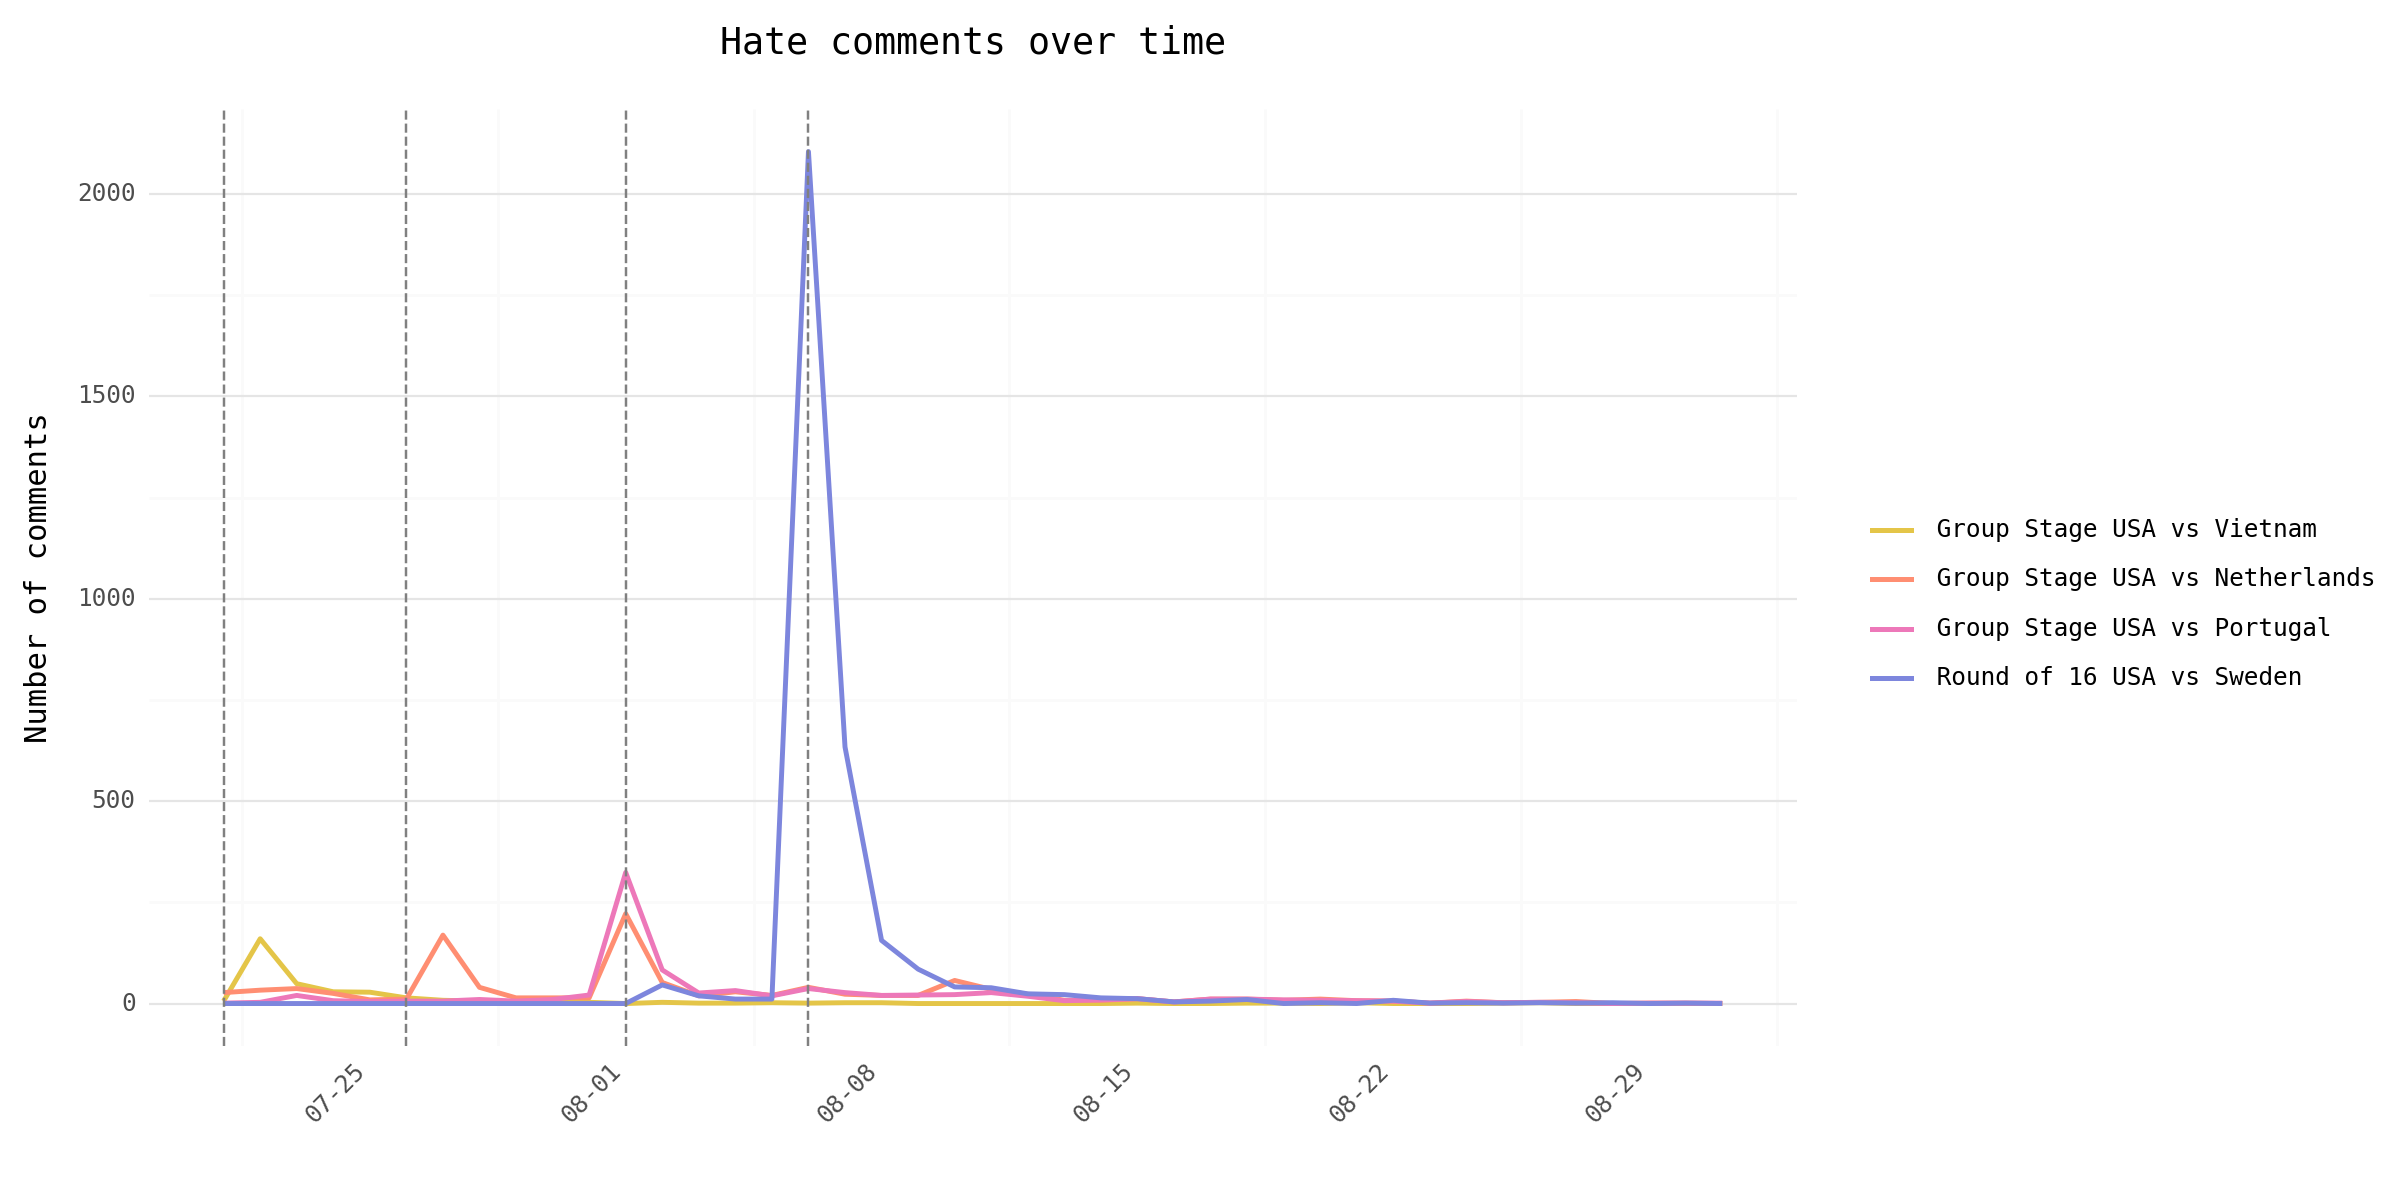

In [ ]:
print(time_plot_line_2)

In [ ]:
df_limited = df[(df['comment_date'] >= '2023-07-21') & (df['comment_date'] < '2023-09-01')]
hate_comments_share = pd.crosstab(
    index=[df_limited['games_ordered'], df_limited['comment_date']],
    columns=df_limited['roberta_label'],
    normalize='index',
    margins=False
)


In [ ]:
hate_comments_share = hate_comments_share.reset_index()
hate_comments_share

roberta_label,games_ordered,comment_date,0,1
0,Group Stage USA vs Vietnam,2023-07-21,0.923077,0.076923
1,Group Stage USA vs Vietnam,2023-07-22,0.885222,0.114778
2,Group Stage USA vs Vietnam,2023-07-23,0.845912,0.154088
3,Group Stage USA vs Vietnam,2023-07-24,0.848958,0.151042
4,Group Stage USA vs Vietnam,2023-07-25,0.814570,0.185430
...,...,...,...,...
148,Round of 16 USA vs Sweden,2023-08-27,0.937500,0.062500
149,Round of 16 USA vs Sweden,2023-08-28,0.846154,0.153846
150,Round of 16 USA vs Sweden,2023-08-29,1.000000,0.000000
151,Round of 16 USA vs Sweden,2023-08-30,0.857143,0.142857


In [ ]:
hate_comments_share.columns = ['games_ordered', 'comment_date', 'share_not_hate', 'share_hate']

In [ ]:
hate_comments_share.shape

(153, 4)

In [ ]:
from mizani.formatters import percent_format
palette_3 = ['#e4c548', '#81aa67', '#ed78b9', '#7d86dd']
time_plot_share = (
    ggplot(hate_comments_share, aes(x='comment_date', y='share_hate', group='games_ordered', color='games_ordered')) +
    geom_line(size=1) +
    geom_vline(xintercept=reference_dates, linetype='dashed', color='grey', size=0.5) +
    scale_x_date(breaks='1 week', date_labels='%m-%d') +
    scale_y_continuous(labels=percent_format()) +
    scale_color_manual(values=palette_2) +
    labs(title='Share of hate comments over time', x = '', y='Share of comments') +
    guides(color=guide_legend(title='')) +
    theme_minimal() +
    theme(figure_size=(12, 6), axis_text_x=element_text(rotation=45, hjust=1, family = 'monospace'), text=element_text(family='monospace'),
          plot_title=element_text(hjust=0.5, family = 'monospace'), panel_grid_major_x= element_blank())
)

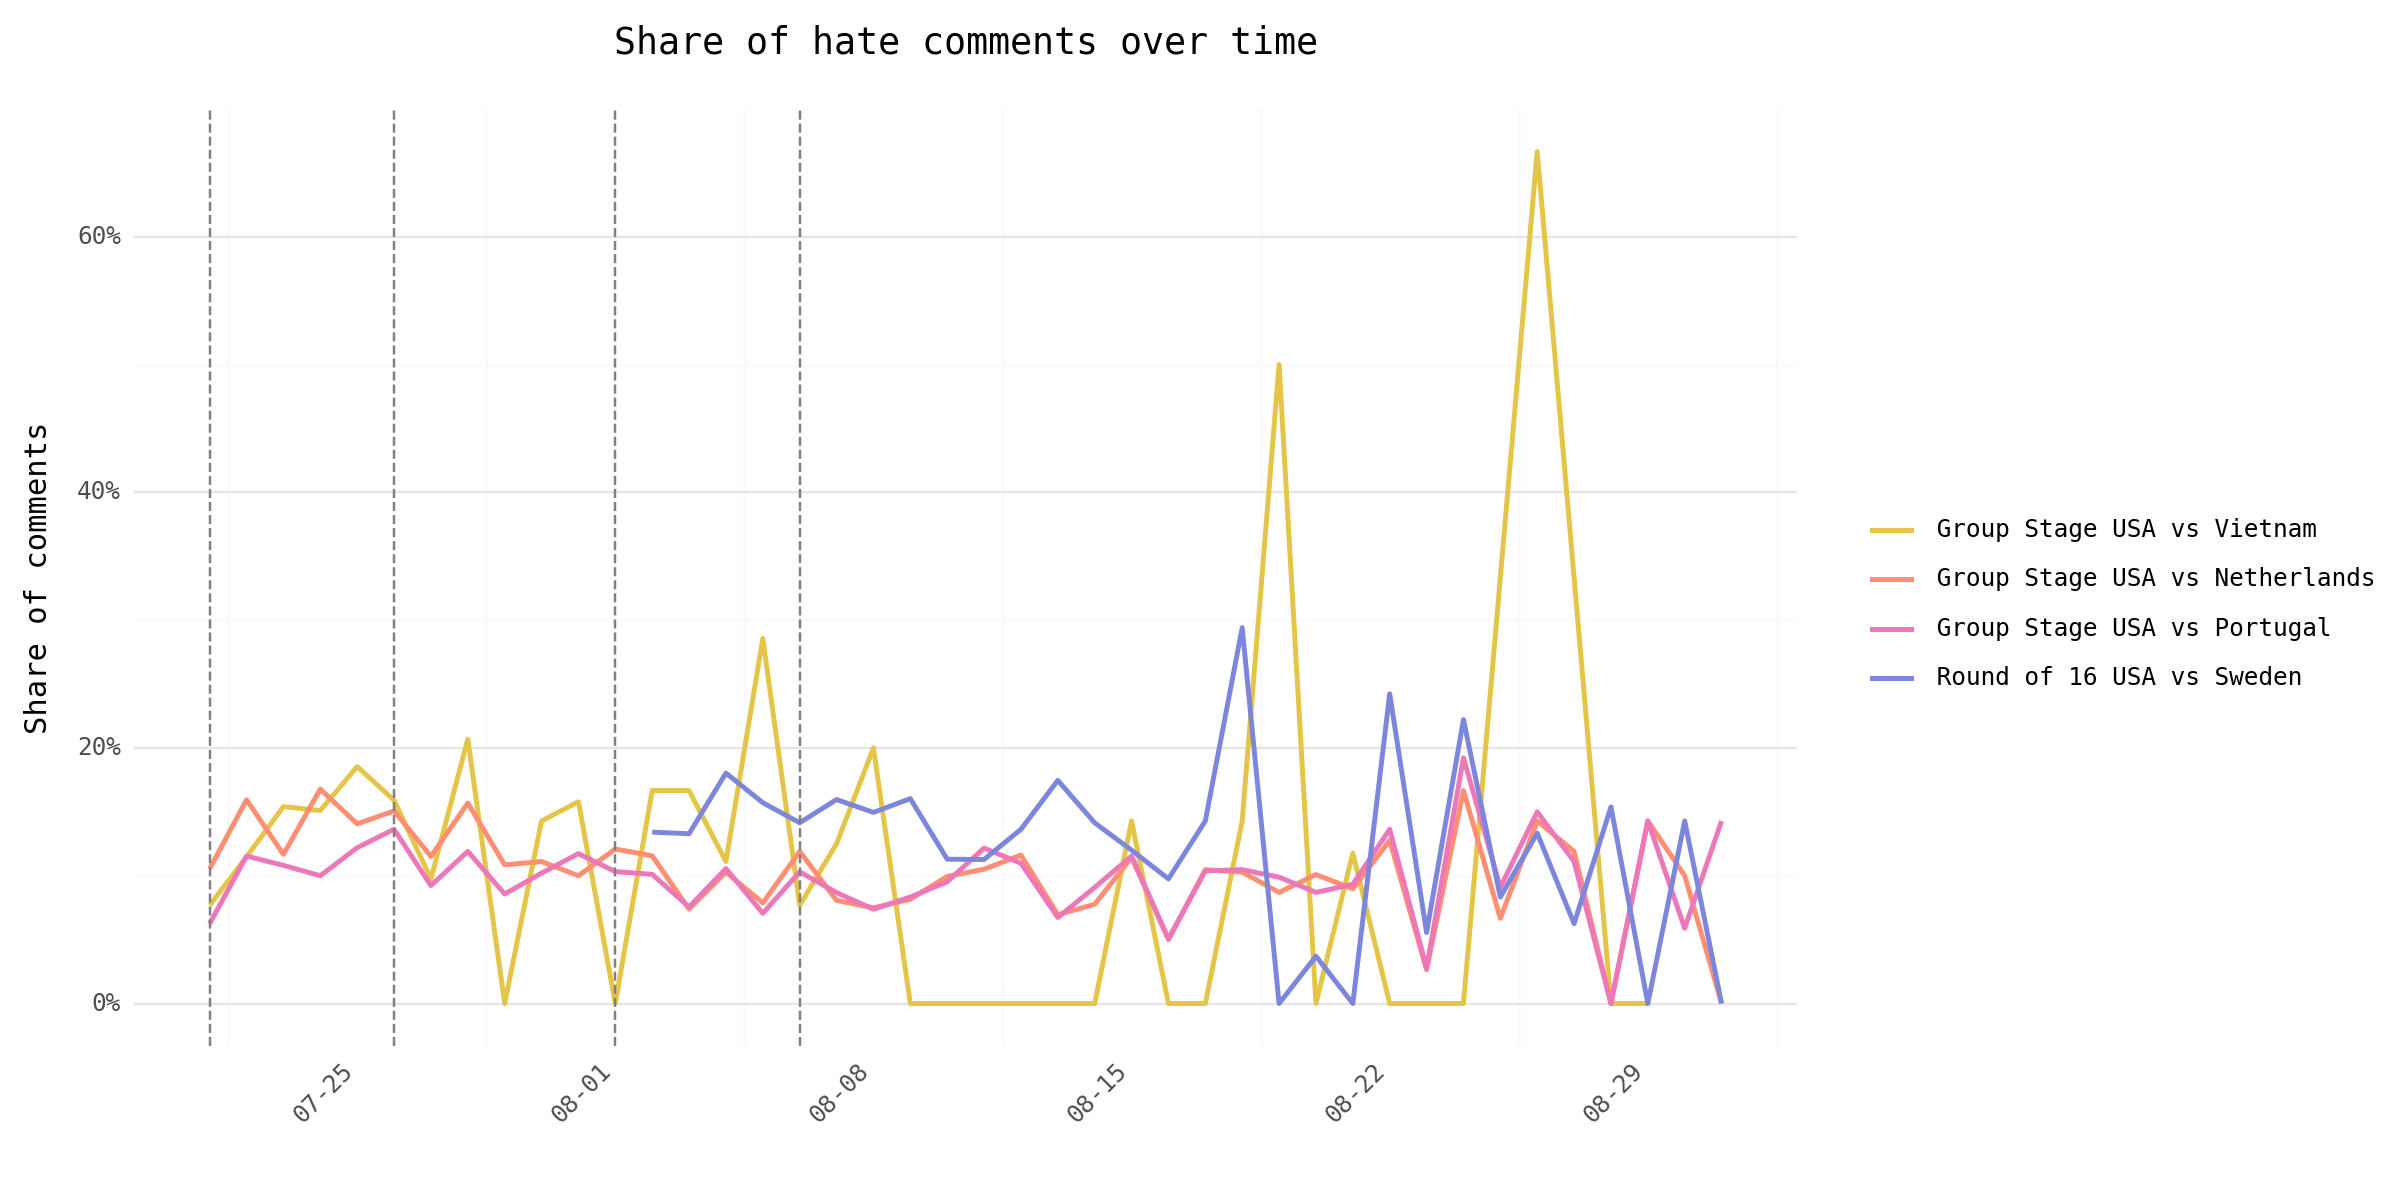

<Figure Size: (1200 x 600)>

In [ ]:
time_plot_share

In [ ]:
total_comments_share = pd.crosstab(
    index=[df_limited['games_ordered']],
    columns=df_limited['roberta_label'],
    normalize='index',
    margins=False
)

total_comments_share = total_comments_share.reset_index()
total_comments_share.head()


roberta_label,games_ordered,0,1
0,Group Stage USA vs Vietnam,0.873985,0.126015
1,Group Stage USA vs Netherlands,0.890283,0.109717
2,Group Stage USA vs Portugal,0.901356,0.098644
3,Round of 16 USA vs Sweden,0.855777,0.144223


In [ ]:
total_comments_share.columns = ['games_ordered', 'share_not_hate', 'share_hate']

In [ ]:
total_comments_share.head()

,games_ordered,share_not_hate,share_hate
0,Group Stage USA vs Vietnam,0.873985,0.126015
1,Group Stage USA vs Netherlands,0.890283,0.109717
2,Group Stage USA vs Portugal,0.901356,0.098644
3,Round of 16 USA vs Sweden,0.855777,0.144223


In [ ]:
total_comments_share = pd.melt(total_comments_share, id_vars=['games_ordered'], value_vars=['share_not_hate', 'share_hate'],
                    var_name='comment_type', value_name='share')
total_comments_share.head()

,games_ordered,comment_type,share
0,Group Stage USA vs Vietnam,share_not_hate,0.873985
1,Group Stage USA vs Netherlands,share_not_hate,0.890283
2,Group Stage USA vs Portugal,share_not_hate,0.901356
3,Round of 16 USA vs Sweden,share_not_hate,0.855777
4,Group Stage USA vs Vietnam,share_hate,0.126015


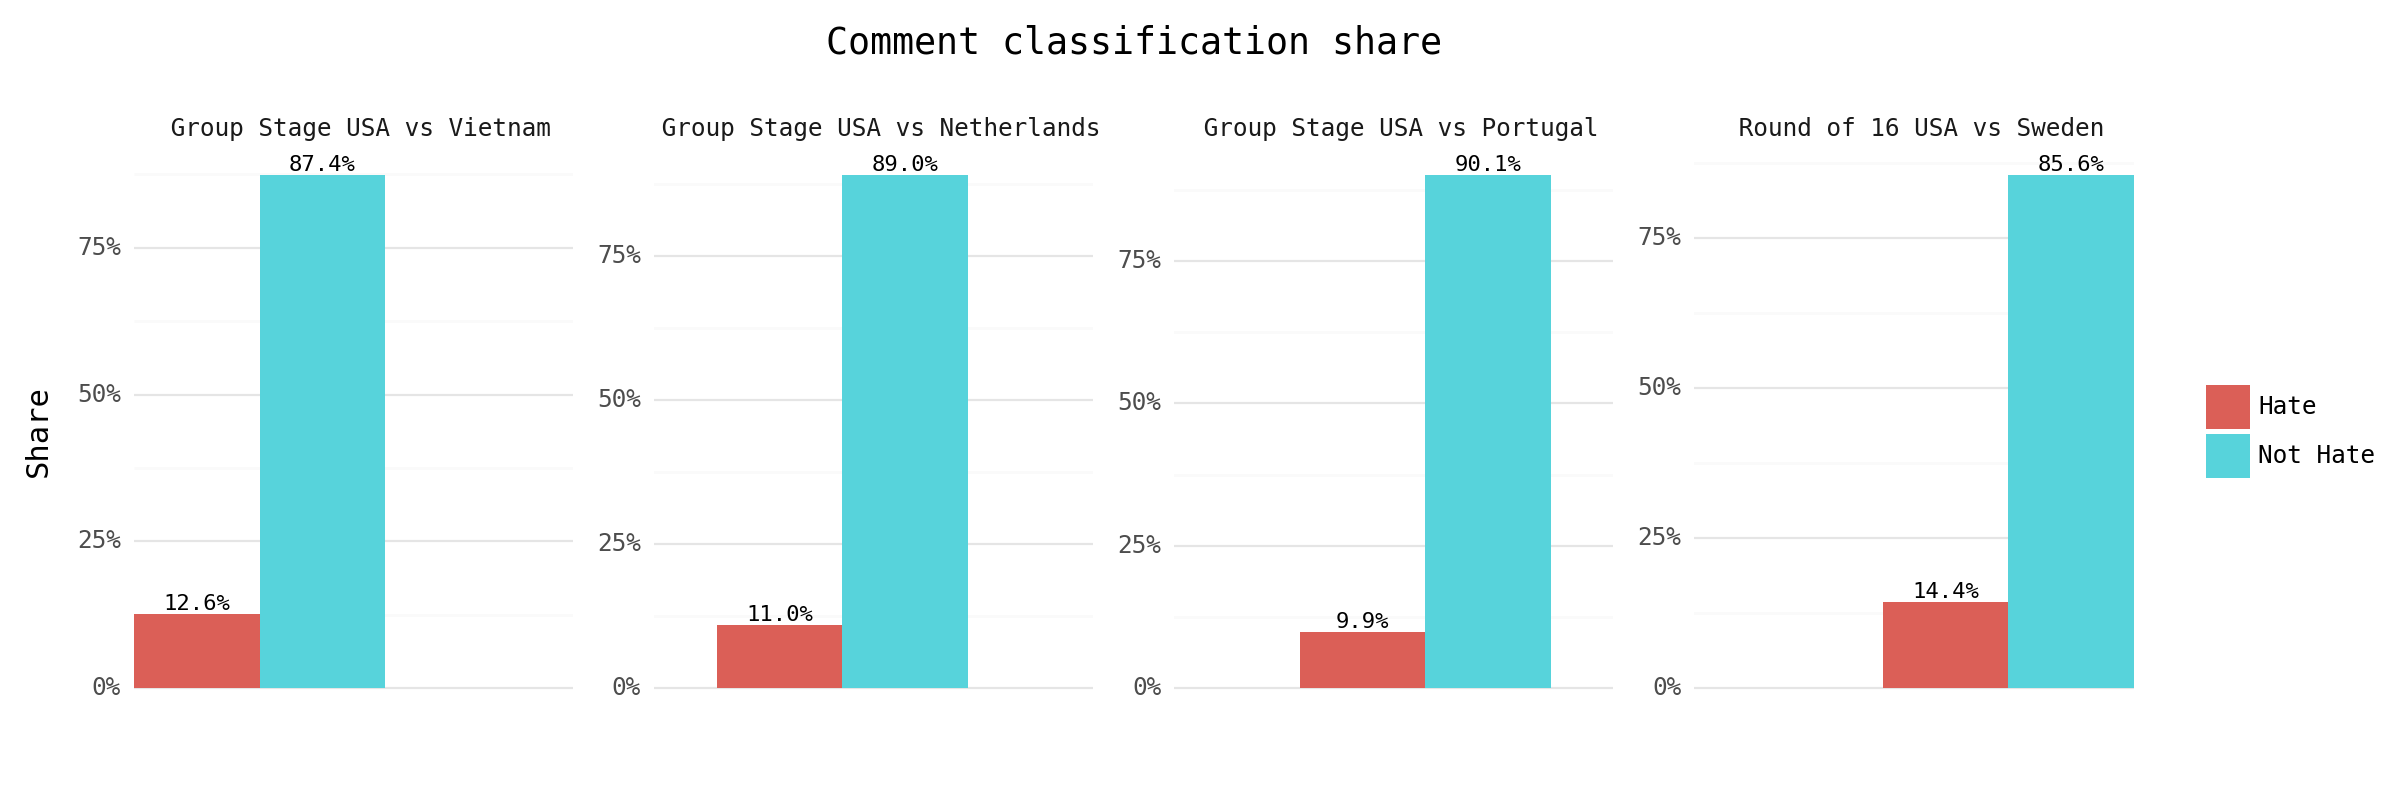

In [ ]:
total_share_plot = (
    ggplot(total_comments_share, aes(x='games_ordered', y='share', fill='comment_type', label = 'share')) +
    geom_bar(stat='identity', position='dodge', width = 4) +
    facet_wrap('~games_ordered', scales='free_y', nrow = 1) +  # One row for each game
    labs(title='Comment classification share', x='', y='Share') +
    scale_fill_discrete(labels = ['Hate', 'Not Hate']) +
    scale_y_continuous(labels=percent_format()) +
    geom_text(position=position_dodge(width = 4), size=8, va='bottom', format_string='{:.1%}') +
    #geom_text(aes(label= 'share', group = 'comment_type'), position = 'dodge', format_string='{:.1%}') +
    theme_minimal() +
    theme(figure_size=(12,4), axis_text_x=element_blank(), text=element_text(family='monospace'),
          plot_title=element_text(hjust=0.5, family = 'monospace'), panel_grid_major_x= element_blank(),
          legend_title=element_blank())
)

print(total_share_plot)

In [ ]:
total_comments = df_limited.groupby(['games_ordered', 'roberta_label']).size().reset_index(name='total_comments')

In [ ]:
total_comments.head()

,games_ordered,roberta_label,total_comments,label
0,Group Stage USA vs Vietnam,0,2261,Not Hate
1,Group Stage USA vs Vietnam,1,326,Hate
2,Group Stage USA vs Netherlands,0,8585,Not Hate
3,Group Stage USA vs Netherlands,1,1058,Hate
4,Group Stage USA vs Portugal,0,7776,Not Hate


In [ ]:
total_comments['label'] = total_comments['roberta_label'].replace({0: 'Not Hate', 1: 'Hate'})

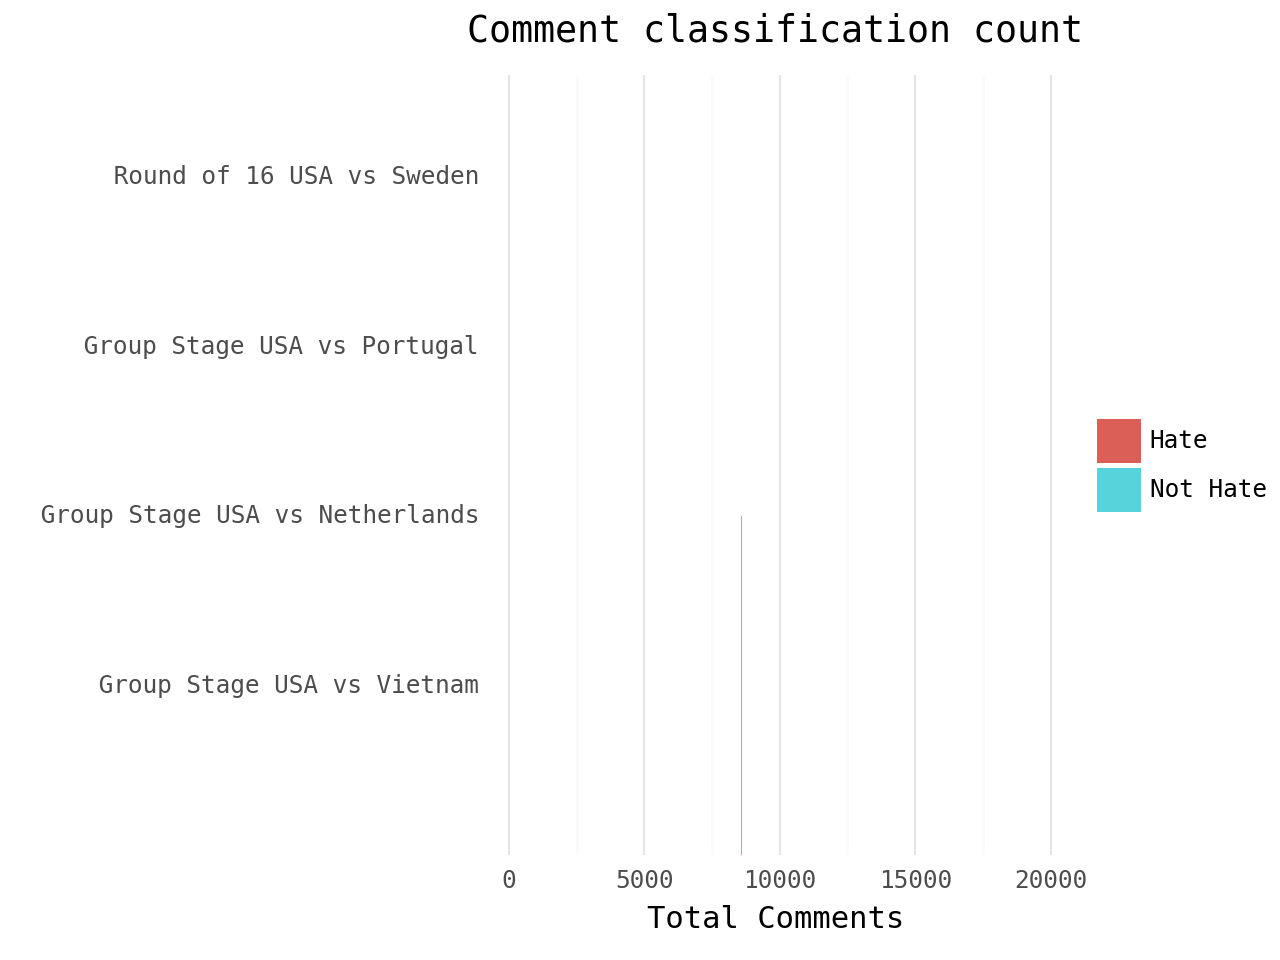

In [ ]:
total_comments_plot = (
    ggplot(total_comments, aes(x='total_comments', y='games_ordered', fill='label', label='total_comments')) +
    geom_bar(stat='identity', position='stack', width=1) +
    labs(title='Comment classification count', x='Total Comments', y='') +
    theme_minimal() +
    theme(
        text=element_text(family='monospace'),
        plot_title=element_text(hjust=0.5, family='monospace'),
        panel_grid_major_y=element_blank(),
        legend_title=element_blank()
    )
)

print(total_comments_plot)

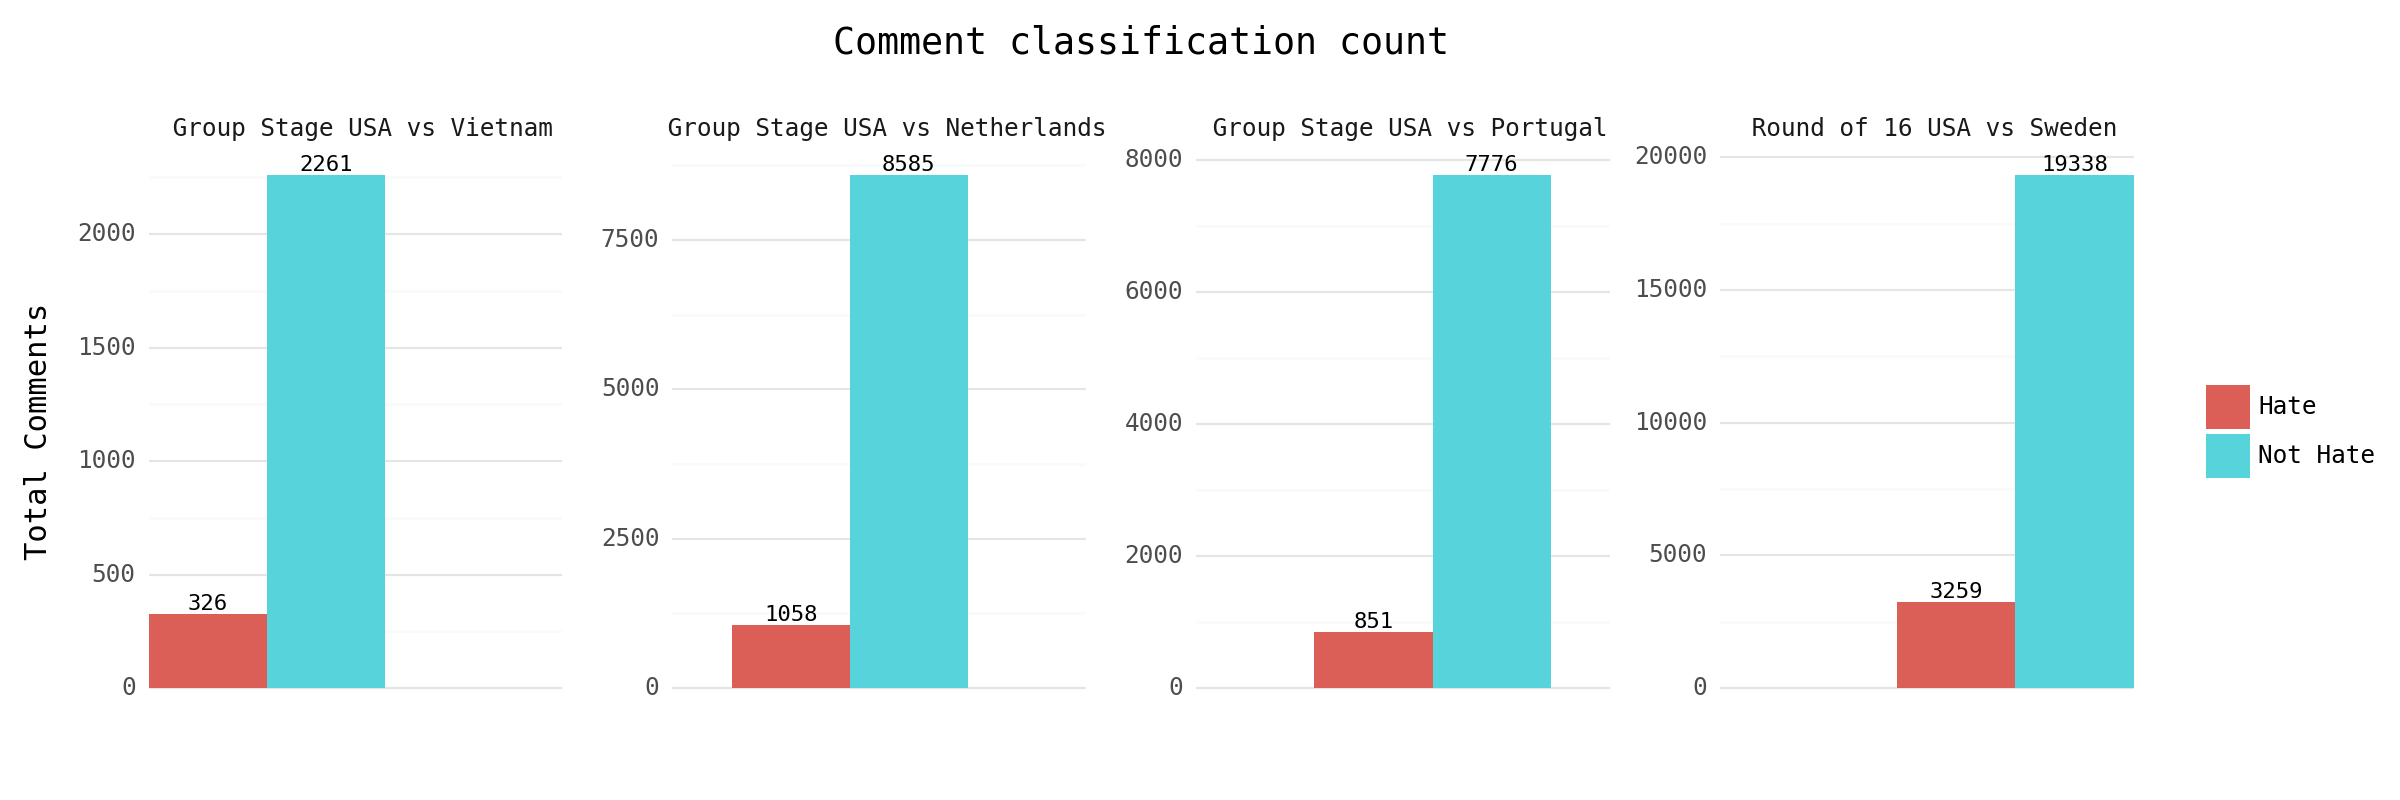

In [ ]:
total_comments_plot = (
    ggplot(total_comments, aes(x='games_ordered', y='total_comments', fill='label', label = 'total_comments')) +
    geom_bar(stat='identity', position='dodge', width=4) +
    geom_text(position=position_dodge(width = 4), size=8, va='bottom') +
    facet_wrap('~games_ordered', scales='free_y', nrow=1) +
    labs(title='Comment classification count', x='', y='Total Comments') +
    theme_minimal() +
    theme(
        figure_size=(12, 4),
        axis_text_x=element_blank(),
        text=element_text(family='monospace'),
        plot_title=element_text(hjust=0.5, family='monospace'),
        panel_grid_major_x=element_blank(),
        legend_title=element_blank()
    )
)

print(total_comments_plot)

In [ ]:
total_comments_share = pd.crosstab(
    index=[df_limited['games_ordered']],
    columns=df_limited['roberta_label'],
    normalize='index',
    margins=False
)

total_comments_share = total_comments_share.reset_index()
total_comments_share.columns = ['games_ordered', 'share_not_hate', 'share_hate']
total_comments_share.head()

,games_ordered,share_not_hate,share_hate
0,Group Stage USA vs Vietnam,0.873985,0.126015
1,Group Stage USA vs Netherlands,0.890283,0.109717
2,Group Stage USA vs Portugal,0.901356,0.098644
3,Round of 16 USA vs Sweden,0.855777,0.144223


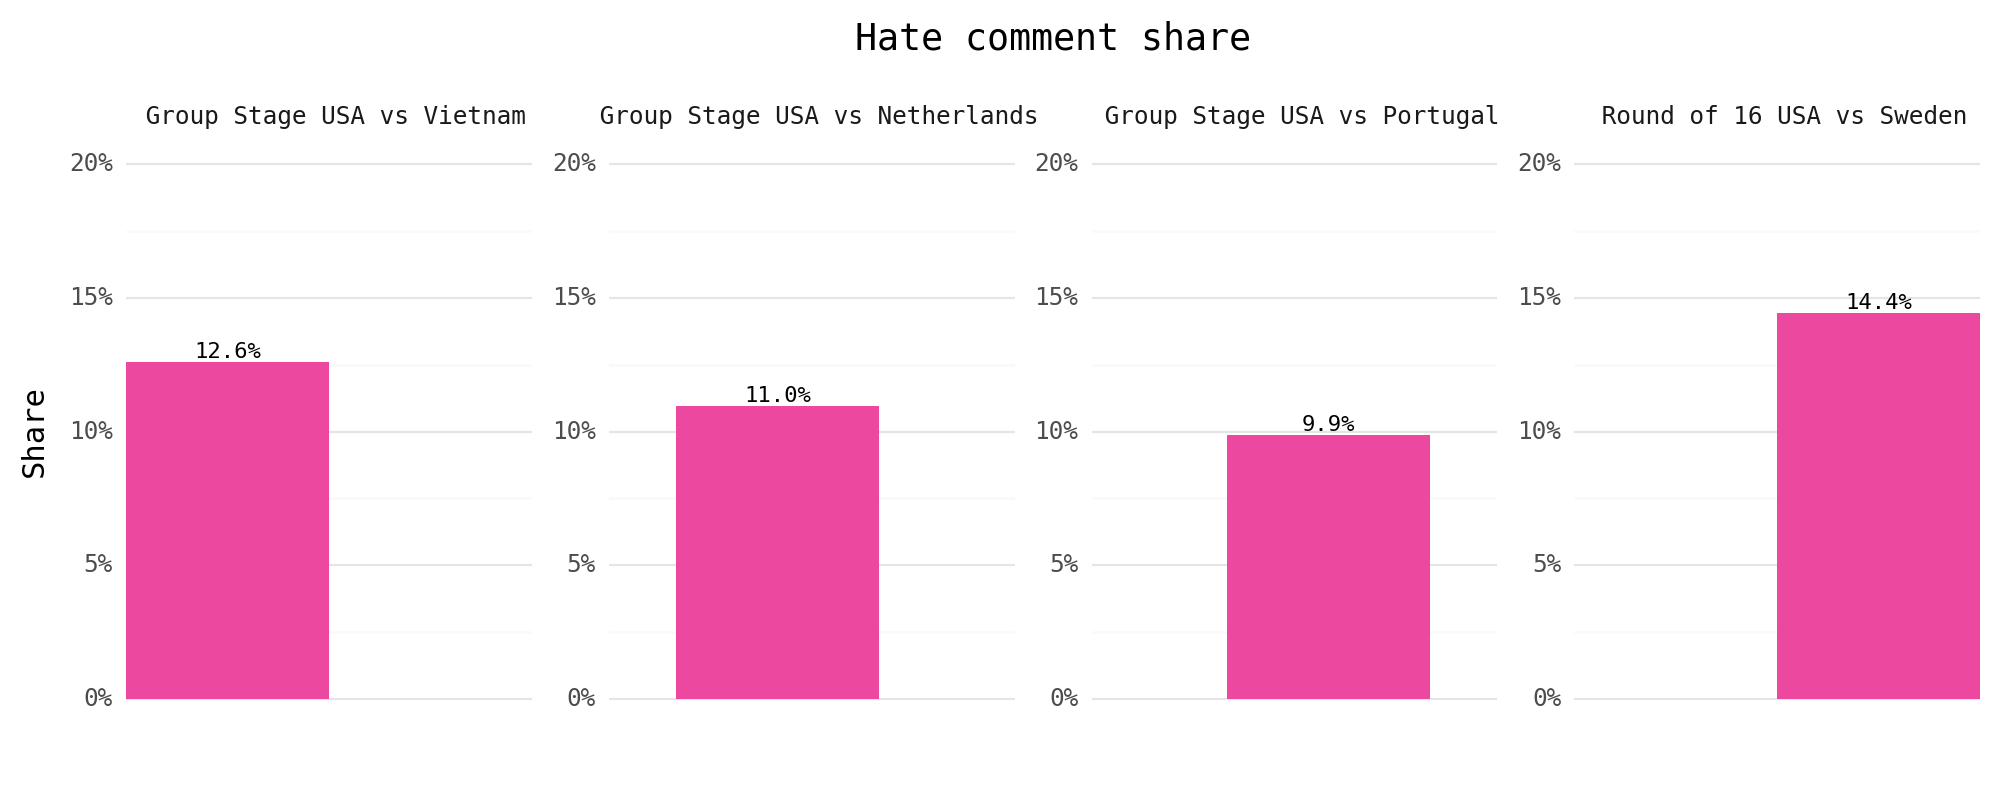

In [ ]:
total_share_plot_1 = (
    ggplot(total_comments_share, aes(x='games_ordered', y='share_hate', label = 'share_hate')) +
    geom_bar(stat='identity', width = 3, fill='#ed48a0') +
    facet_wrap('~games_ordered', scales='free_y', nrow = 1) +  # One row for each game
    labs(title='Hate comment share', x='', y='Share') +
    #scale_fill_discrete(labels = ['Hate', 'Not Hate']) +
    scale_y_continuous(labels=percent_format(),  limits=(0, 0.2)) +
    geom_text(position=position_dodge(width = 3), size=8, va='bottom', format_string='{:.1%}') +
    #geom_text(aes(label= 'share', group = 'comment_type'), position = 'dodge', format_string='{:.1%}') +
    theme_minimal() +
    theme(figure_size=(10,4), axis_text_x=element_blank(), text=element_text(family='monospace'),
          plot_title=element_text(hjust=0.5, family = 'monospace'), panel_grid_major_x= element_blank(),
          legend_title=element_blank())
)

print(total_share_plot_1)

In [ ]:
total_comments_count = pd.crosstab(
    index=[df_limited['games_ordered']],
    columns=df_limited['roberta_label'],
    margins=False
)

total_comments_count = total_comments_count.reset_index()
total_comments_count.columns = ['games_ordered', 'Not_Hate', 'Hate']
total_comments_count.head()

,games_ordered,Not_Hate,Hate
0,Group Stage USA vs Vietnam,2261,326
1,Group Stage USA vs Netherlands,8585,1058
2,Group Stage USA vs Portugal,7776,851
3,Round of 16 USA vs Sweden,19338,3259


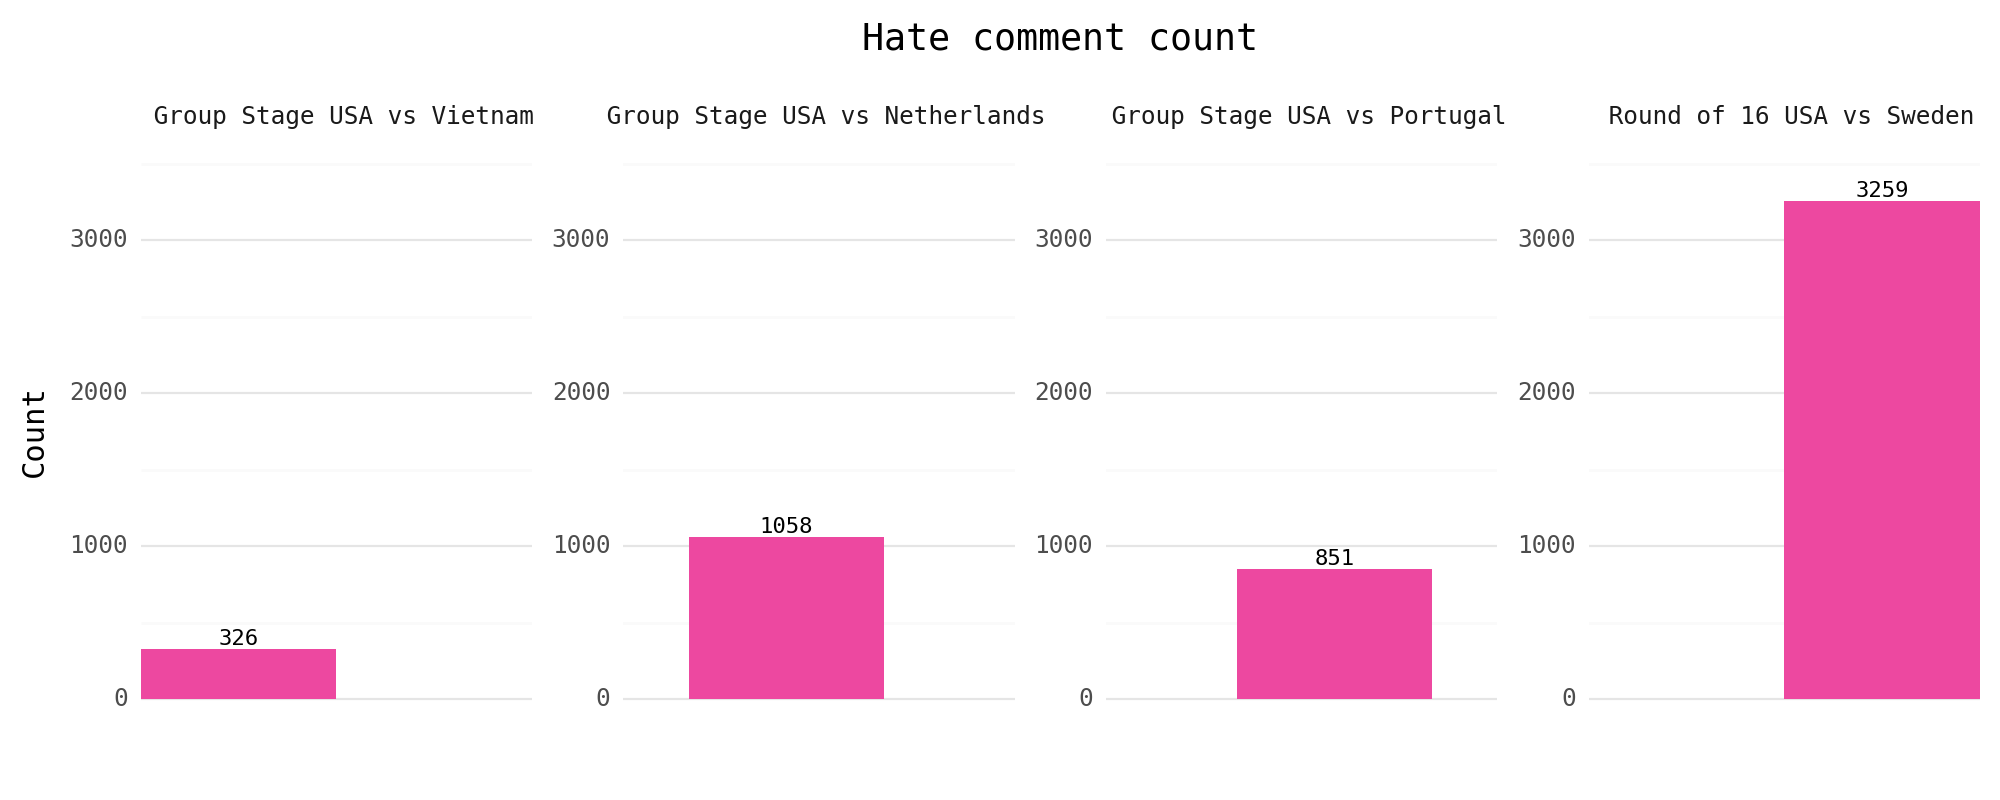

In [ ]:

total_count_plot_1 = (
    ggplot(total_comments_count, aes(x='games_ordered', y='Hate', label = 'Hate')) +
    geom_bar(stat='identity', width = 3, fill='#ed48a0') +
    facet_wrap('~games_ordered', scales='free_y', nrow = 1) +  # One row for each game
    labs(title='Hate comment count', x='', y='Count') +
    #scale_fill_discrete(labels = ['Hate', 'Not Hate']) +
    scale_y_continuous(limits=(0, 3500)) +
    geom_text(position=position_dodge(width = 3), size=8, va='bottom') +
    #geom_text(aes(label= 'share', group = 'comment_type'), position = 'dodge', format_string='{:.1%}') +
    theme_minimal() +
    theme(figure_size=(10,4), axis_text_x=element_blank(), text=element_text(family='monospace'),
          plot_title=element_text(hjust=0.5, family = 'monospace'), panel_grid_major_x= element_blank(),
          legend_title=element_blank())
)

print(total_count_plot_1)